### Set Up Workspace

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path='/home/jovyan/cmip6-outreach-tool/data/'
this_experiment_id = ['historical','ssp126', 'ssp370','ssp245','ssp585']

### Read In Data

This is generated in Step0_ProcessRawData

In [3]:
dict_timeSeries = dict()
for experiment_id in this_experiment_id:
    filename=data_path+'timeSeries_byModel_'+experiment_id+'.pickle'
    with open(filename, 'rb') as f:
        ds=pickle.load(f)
    dict_timeSeries[experiment_id]=ds

### Example Figure

-----------historical-----------
-----------ssp126-----------
-----------ssp370-----------
-----------ssp245-----------
-----------ssp585-----------


Text(0, 0.5, 'Temperature')

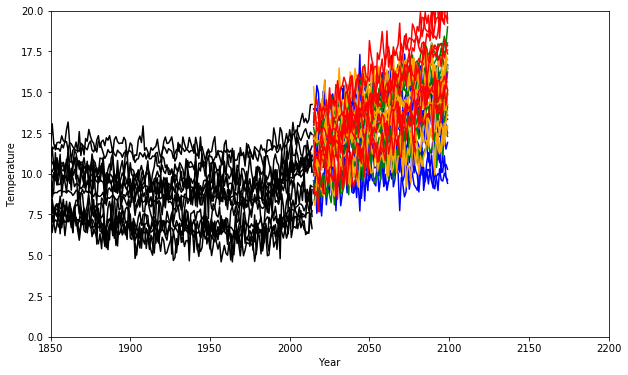

In [8]:
################## FIGURE SETTINGS YOU CAN ADJUST ################

# For Seattle: 47.6062, 237.67
# For Chicago: 41.8781, 272.3702
thislat = 41.8781
thislon = 272.3702
colors=['black','blue','green','orange','red']
smoothing_on=False
smoothing_window=10
normalizeToHist=False

################## MAKE FIGURE ###########################

if normalizeToHist:
    baseClim = dict_timeSeries['historical']
    #baseClim=baseClim.drop('time')
    modelnames = []
    for varname,da in baseClim.data_vars.items():
        modelnames.append(varname)
    baseClim = baseClim.isel(year=range(0,50)).mean('year')
        
fig = plt.figure(figsize=(10,6))
for i in range(0,len(this_experiment_id)):
    # Define experiment id
    experiment_id = this_experiment_id[i]
    print('-----------'+experiment_id+'-----------')
    
    # Read in data for experiment id
    ds_annual = dict_timeSeries[experiment_id]
    modelnames = []
    for varname,da in ds_annual.data_vars.items():
        modelnames.append(varname)
        
    if normalizeToHist:
        ds_annual = ds_annual - baseClim
    
    # Select that one location
    ds_annual=ds_annual.sel(lon=thislon, lat=thislat, method='nearest')
        
    
    # Plot each model
    for modelname in modelnames:
        if normalizeToHist and((modelname=='CESM2')or(modelname=='MPI-ESM1-2-HR')):
            print('skipping '+modelname)
        else:
            if smoothing_on:
                valsToPlot = ds_annual[modelname].rolling(year=smoothing_window).mean().values
            else:
                valsToPlot=ds_annual[modelname].values
            plt.plot(ds_annual['year'].values,valsToPlot,label=modelname,color=colors[i])
        
plt.xlabel('Year')
plt.xlim([1850,2200])
plt.ylim([0,20])
plt.ylabel('Temperature')